,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


--- Missing Values Check ---
     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False      

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


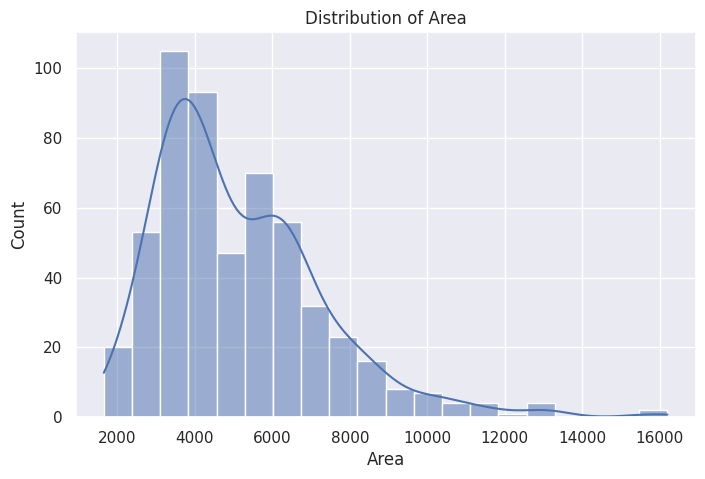

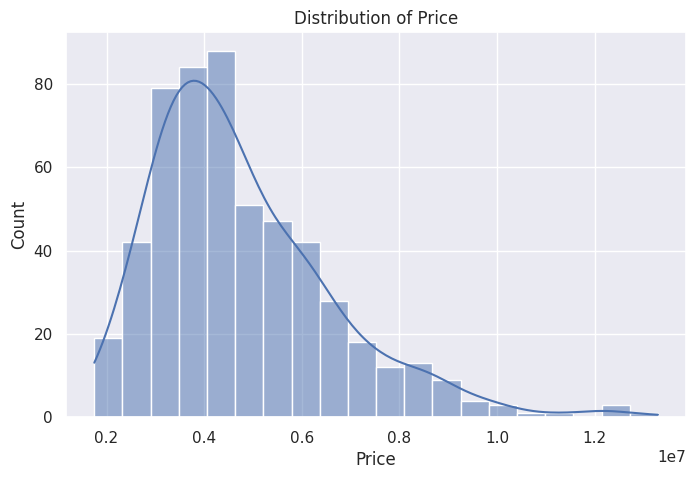

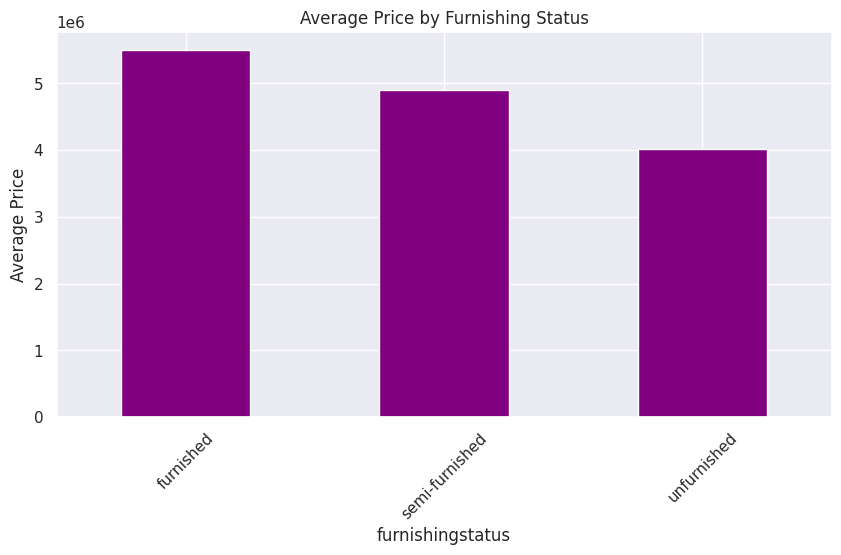


Average Price by Furnishing Status:
furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64


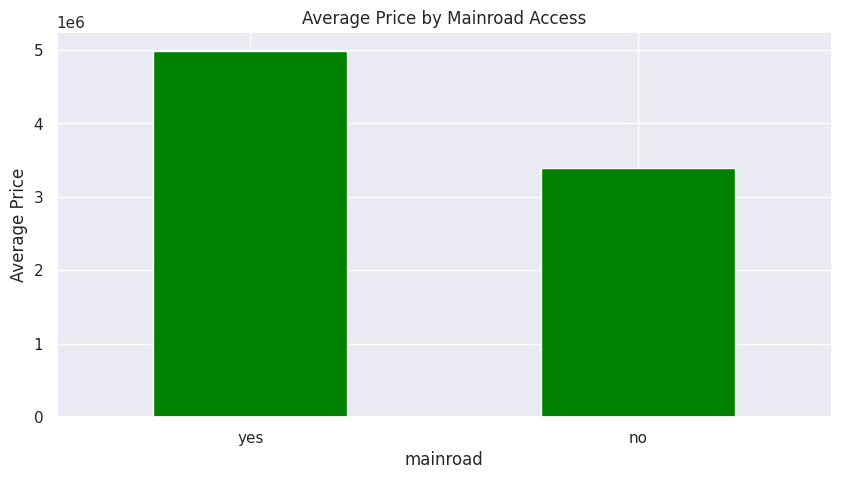


Average Price by Mainroad:
mainroad
yes    4.991777e+06
no     3.398905e+06
Name: price, dtype: float64

Average Price by Bedrooms:
bedrooms
5    5.819800e+06
4    5.729758e+06
3    4.954598e+06
6    4.791500e+06
2    3.632022e+06
1    2.712500e+06
Name: price, dtype: float64


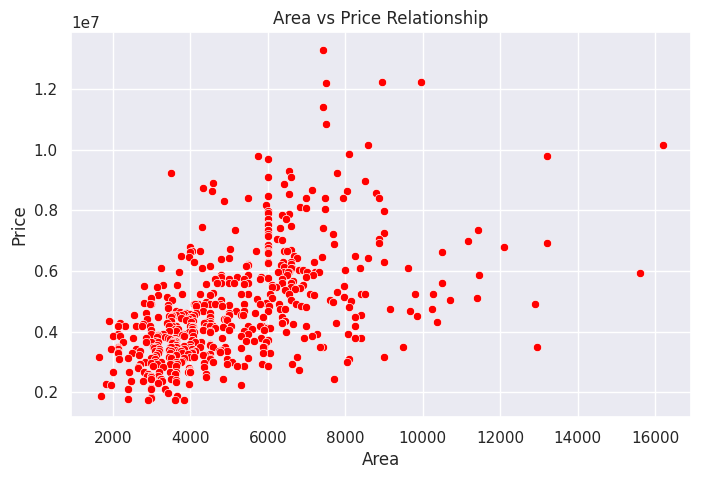

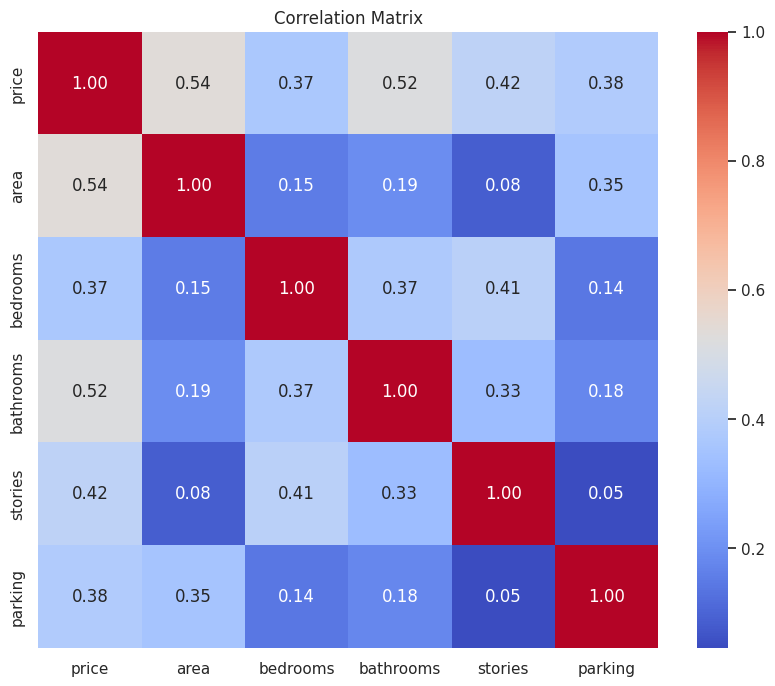

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_csv("Housing.csv")

display(df.head())

print("--- Missing Values Check ---")
print(df.isna())

print("\n--- Sum of Missing Values ---")
print(df.isna().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated()[df.duplicated()==True])

print("\nShape (rows, columns): ", df.shape)
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Descriptive Statistics ---")
display(df.describe(include='all'))

plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=20, kde=True)
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.show()

furnishing_price = df.groupby('furnishingstatus')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
furnishing_price.plot(kind='bar', color='purple')
plt.title("Average Price by Furnishing Status")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

print("\nAverage Price by Furnishing Status:")
print(furnishing_price)

mainroad_price = df.groupby('mainroad')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
mainroad_price.plot(kind='bar', color='green')
plt.title("Average Price by Mainroad Access")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.show()

print("\nAverage Price by Mainroad:")
print(mainroad_price)

bedrooms_price = df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)
print("\nAverage Price by Bedrooms:")
print(bedrooms_price)

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df, color='red')
plt.title("Area vs Price Relationship")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()